<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">COVID -19</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import glob
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load  Data

In [2]:
covidv= pd.read_csv('../input/country-vaccinations/country_vaccinations.csv')
# vacmanu = pd.read_csv('country_vaccinations_by_manufacturer.csv')

In [3]:
covidv.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Prepare Data and EDA </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

## EDA and Prepare Data

In [4]:
covidv.index

RangeIndex(start=0, stop=31240, step=1)

In [5]:
# information about dataset 
covidv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [6]:
# Convert date from object to datetime format-------------------------------------------------
covidv['date'] = pd.to_datetime(covidv['date'], format = '%Y-%m-%d')
covidv
#covidv['Date'] = pd.to_datetime(covidv['Date'])
# Create date columns for analizer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
covidv['Day_num'] = le.fit_transform(covidv.date)
covidv['Day'] = covidv['date'].dt.day
covidv['Month'] = covidv['date'].dt.month
covidv['Year'] = covidv['date'].dt.year
covidv

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Day_num,Day,Month,Year
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,82,22,2,2021
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,83,23,2,2021
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,84,24,2,2021
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,85,25,2,2021
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,86,26,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,221,11,7,2021
31236,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,222,12,7,2021
31237,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,223,13,7,2021
31238,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,224,14,7,2021


In [7]:
covidv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              31240 non-null  object        
 1   iso_code                             31240 non-null  object        
 2   date                                 31240 non-null  datetime64[ns]
 3   total_vaccinations                   17451 non-null  float64       
 4   people_vaccinated                    16554 non-null  float64       
 5   people_fully_vaccinated              13795 non-null  float64       
 6   daily_vaccinations_raw               14421 non-null  float64       
 7   daily_vaccinations                   30948 non-null  float64       
 8   total_vaccinations_per_hundred       17451 non-null  float64       
 9   people_vaccinated_per_hundred        16554 non-null  float64       
 10  people_ful

In [8]:
print("Number of data ",covidv.shape)

Number of data  (31240, 19)


In [9]:
# Last people vaccinated in Iran
print("Last people vaccinated in Iran\n", 
      covidv[covidv['country'] == 'Iran'][['people_vaccinated']].tail(1))

Last people vaccinated in Iran
        people_vaccinated
13263          4390342.0


In [10]:
# check miss value
covidv.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
Day_num                                    0
Day                                        0
Month                                      0
Year                                       0
dtype: int64

Text(0, 0.5, 'total_vaccinations')

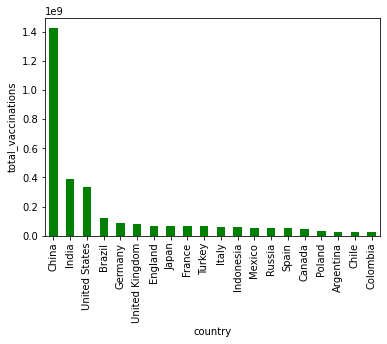

In [11]:
# 20 Country sort max Total Vaccinations
count_total_v = covidv.groupby(['country'])['total_vaccinations'].max().sort_values(ascending = False).head(20)
count_total_v
count_total_v.plot(kind = 'bar',color='green')
plt.xlabel('country')
plt.ylabel('total_vaccinations')

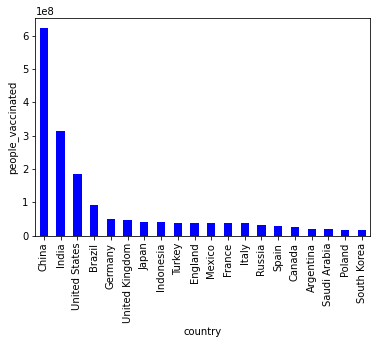

In [12]:
# vaccinated people (get one  or two dose)
people_vac = covidv.groupby(['country'])['people_vaccinated'].max().sort_values(ascending = False).head(20)
people_vac.plot(kind = 'bar',color='blue')
plt.xlabel('country')
plt.ylabel('people_vaccinated')
plt.show()

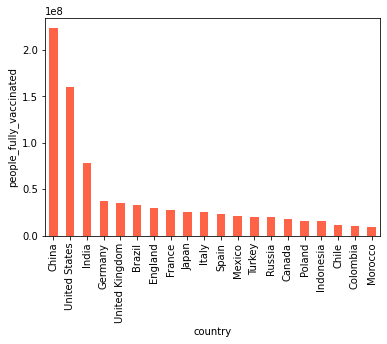

In [13]:
# people_fully_vaccinated(get two dose vaccine)
ful_vac = covidv.groupby(['country'])['people_fully_vaccinated'].max().sort_values(ascending = False).head(20)
ful_vac.plot(kind = 'bar',color='tomato')
plt.xlabel('country')
plt.ylabel('people_fully_vaccinated')
plt.show()

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations'>

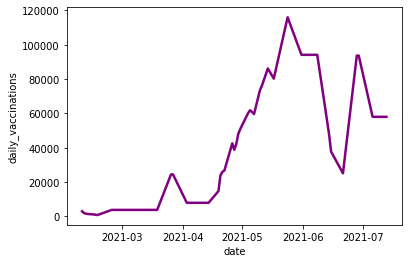

In [14]:
# daily_vaccinations in iran 

Dai_Vac = covidv[covidv['country'] =='Iran']
sns.lineplot(data =Dai_Vac, x='date', y='daily_vaccinations', linewidth=2.5,color='purple')
                 
    

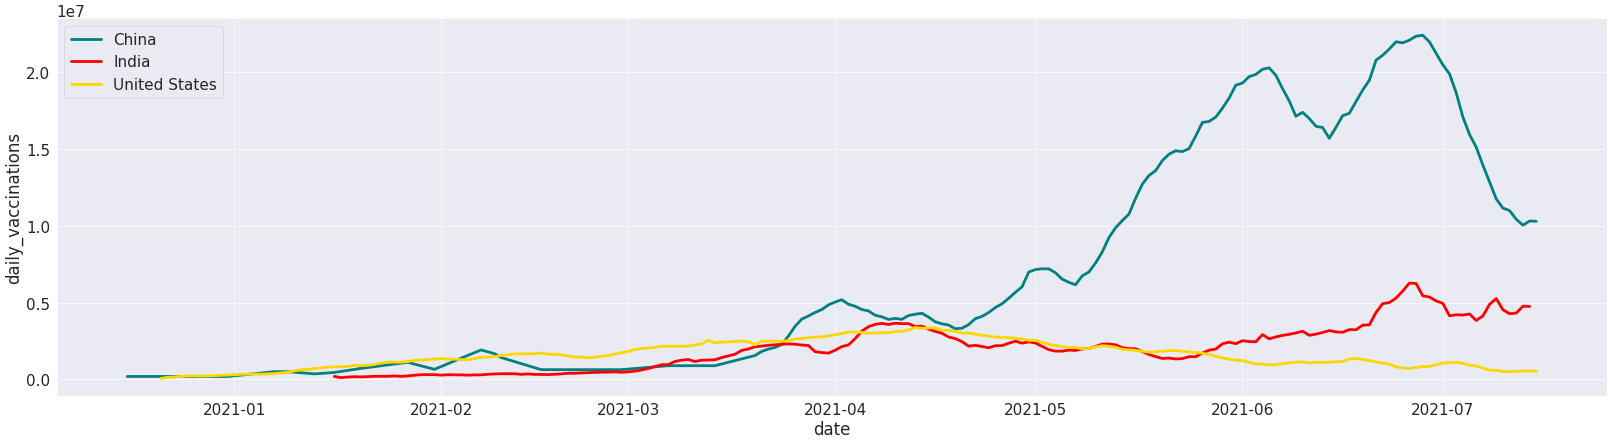

In [15]:
# Daily vaccination Trend of Top 3 Countries leading in Total Number of People Vaccinated
label = covidv.groupby(['country'])['people_vaccinated'].max().sort_values(ascending = False).head(3)
col = ['teal', 'red', 'gold']
sns.set(font_scale=2)
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=50, figsize=(40,10))
for i in range(3):
    Dai_Vac = covidv[covidv['country'] ==people_vac.index[i]]
    sns.lineplot(data =Dai_Vac, x='date', y='daily_vaccinations', linewidth=4,color = col[i],label =label.index[i],ax = ax  )
plt.show()    

<AxesSubplot:ylabel='people_vaccinated_per_hundred'>

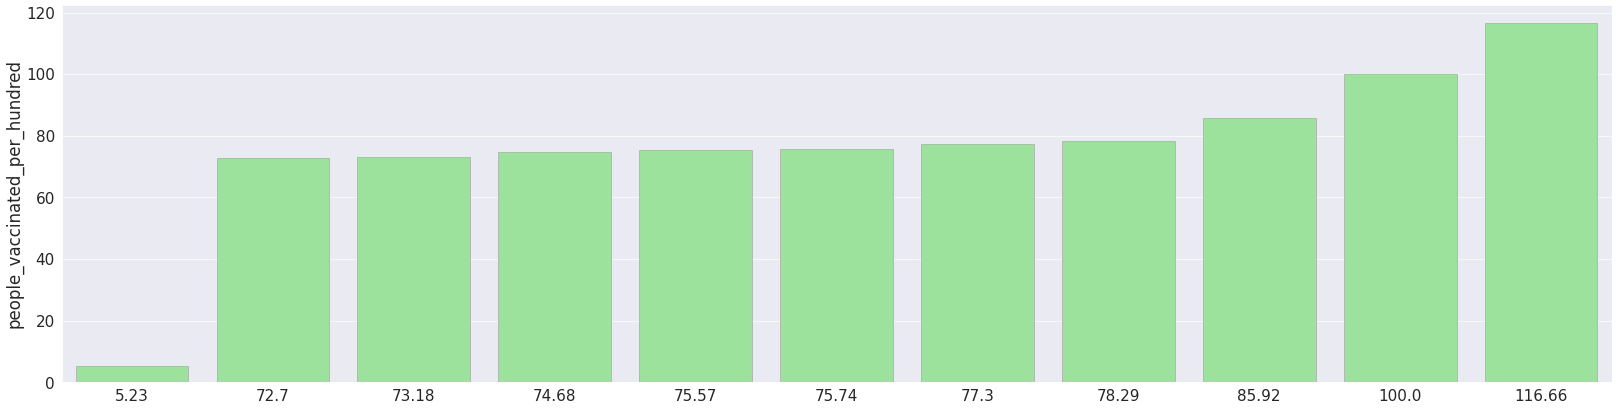

In [16]:
# Total number of people vaccinated per hundred #
# Iran people vaccinated per hundred
peovac_p_hu_iran = covidv.groupby(['country'])['people_vaccinated_per_hundred'].max()['Iran']
pd_iran = pd.Series(peovac_p_hu_iran, name='people_vaccinated_per_hundred',index =['Iran'])

# 10 country max  people vaccinated per hundred
peovac_p_hu = covidv.groupby(['country'])['people_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

#  Use pandas. concat() to merge two Series
df_join_iran_10count = pd.concat([peovac_p_hu,pd_iran ])
sns.set(font_scale=2)
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=50, figsize=(40,10))

sns.barplot(data = df_join_iran_10count,x=df_join_iran_10count.values, y=df_join_iran_10count.index, color='lightgreen',edgecolor='darkgrey')


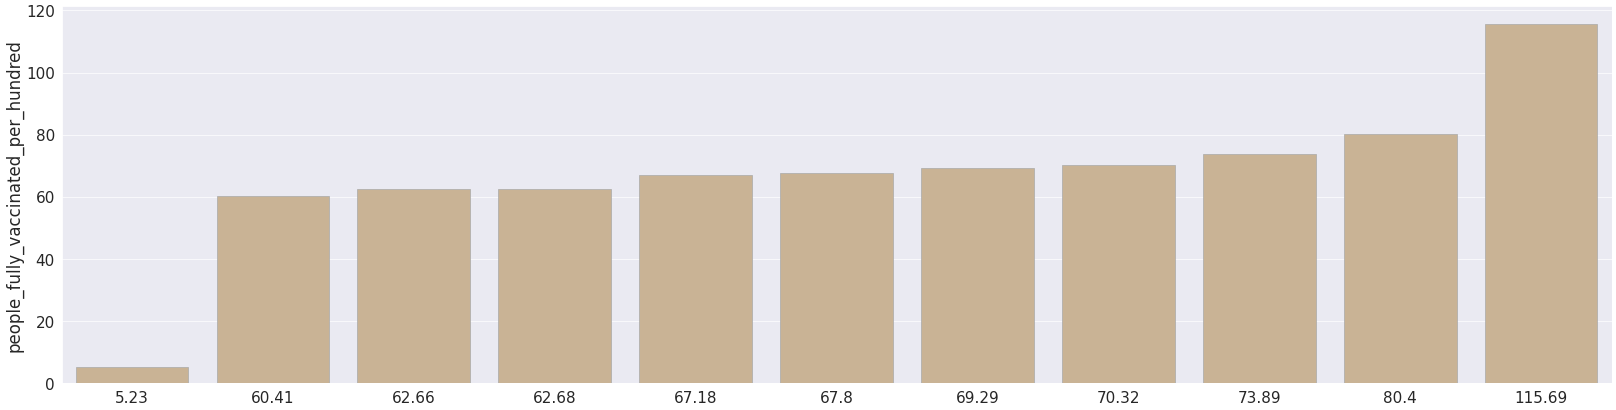

In [17]:

# Iran people  fully vaccinated per hundred
peovac_p_hu_iran_f = covidv.groupby(['country'])['people_fully_vaccinated_per_hundred'].max()['Iran']
pd_iran_f = pd.Series(peovac_p_hu_iran, name='people_fully_vaccinated_per_hundred',index =['Iran'])

# 10 country max  people vaccinated per hundred
peofulvac_p_hu = covidv.groupby(['country'])['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

#  Use pandas. concat() to merge two Series

df_join_iran_10count_ful = pd.concat([peofulvac_p_hu,pd_iran_f ])

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=50, figsize=(40,10))
sns.set(font_scale=2)
sns.barplot(data =df_join_iran_10count_ful ,x=df_join_iran_10count_ful.values, y=df_join_iran_10count_ful.index,color='tan',
            edgecolor='darkgrey',ax = ax)

plt.show()



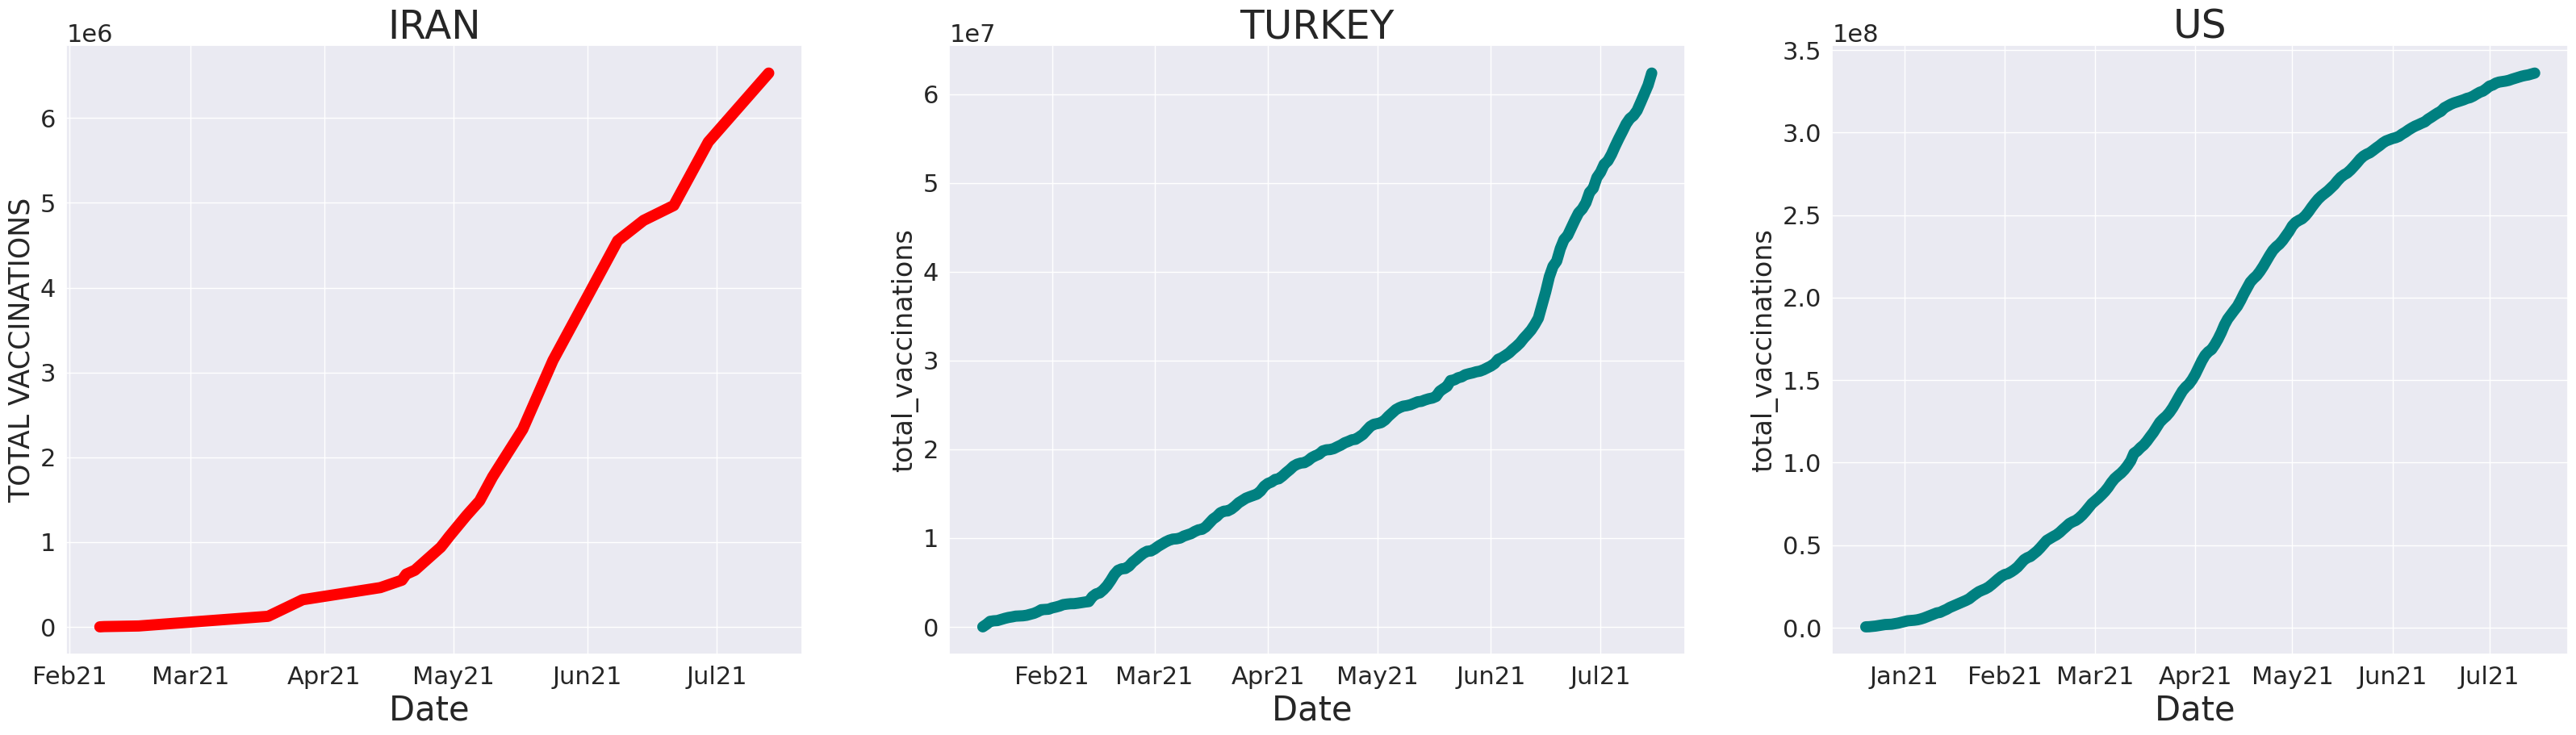

In [18]:
################### Studying Iran Vaccination against Turkey and US ###############
IranVacc = covidv[covidv['country'] == 'Iran']
TurkeyVacc =covidv[covidv['country'] == 'Turkey']
USVacc = covidv[covidv['country'] == 'United States']
fig, ax = plt.subplots(nrows=1, ncols=3, dpi=100, figsize=(40,10))

########################### total Vaccination ####################################

sns.lineplot(data =IranVacc, x='date', y='total_vaccinations',
             ax=ax[0], color = "red", linewidth=10)
sns.lineplot(data = TurkeyVacc, x='date', y='total_vaccinations',
             ax=ax[1], color = 'teal', linewidth=10)
sns.lineplot(data = USVacc, x='date', y='total_vaccinations',
             ax=ax[2], color = 'teal', linewidth=10)
ax[0].set_ylabel("TOTAL VACCINATIONS", fontsize = 25)
ax[0].set_xlabel("Date ",fontsize = 30)
ax[1].set_xlabel("Date ",fontsize = 30)
ax[2].set_xlabel("Date ",fontsize = 30)
ax[0].set_title("IRAN", fontsize=35)
ax[1].set_title("TURKEY", fontsize=35)
ax[2].set_title("US", fontsize=35)
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].xaxis.set_major_formatter(DateFormatter('%b%y'))




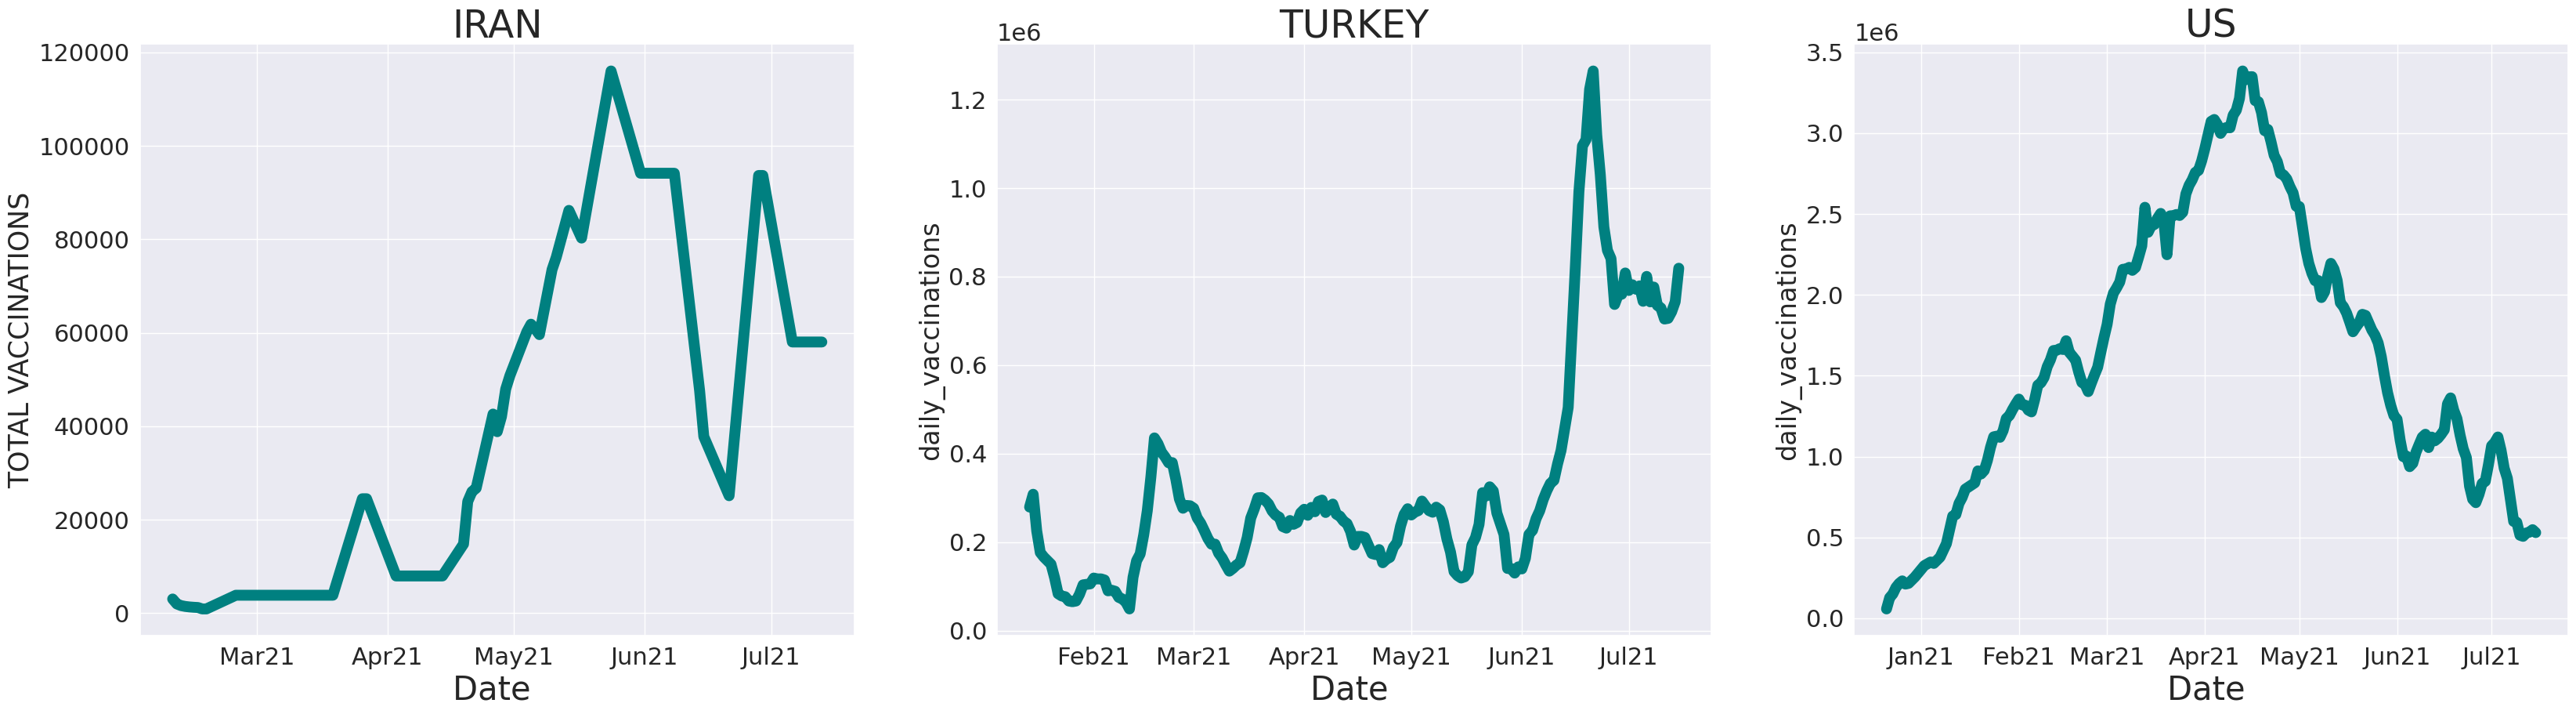

In [19]:
################### Studying Iran Vaccination against Turkey and US ###############
IranVacc = covidv[covidv['country'] == 'Iran']
TurkeyVacc =covidv[covidv['country'] == 'Turkey']
USVacc = covidv[covidv['country'] == 'United States']
fig, ax = plt.subplots(nrows=1, ncols=3, dpi=100, figsize=(40,10))

########################### Daily Vaccination ####################################

sns.lineplot(data =IranVacc, x='date', y='daily_vaccinations', ax=ax[0], color = 'teal', linewidth=10)
sns.lineplot(data = TurkeyVacc, x='date', y='daily_vaccinations',ax=ax[1], color = 'teal', linewidth=10)
sns.lineplot(data = USVacc, x='date', y='daily_vaccinations',ax=ax[2], color = 'teal', linewidth=10)
ax[0].set_ylabel("TOTAL VACCINATIONS", fontsize = 25)
ax[0].set_xlabel("Date ",fontsize = 30)
ax[1].set_xlabel("Date ",fontsize = 30)
ax[2].set_xlabel("Date ",fontsize = 30)
ax[0].set_title("IRAN", fontsize=35)
ax[1].set_title("TURKEY", fontsize=35)
ax[2].set_title("US", fontsize=35)
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].xaxis.set_major_formatter(DateFormatter('%b%y'))


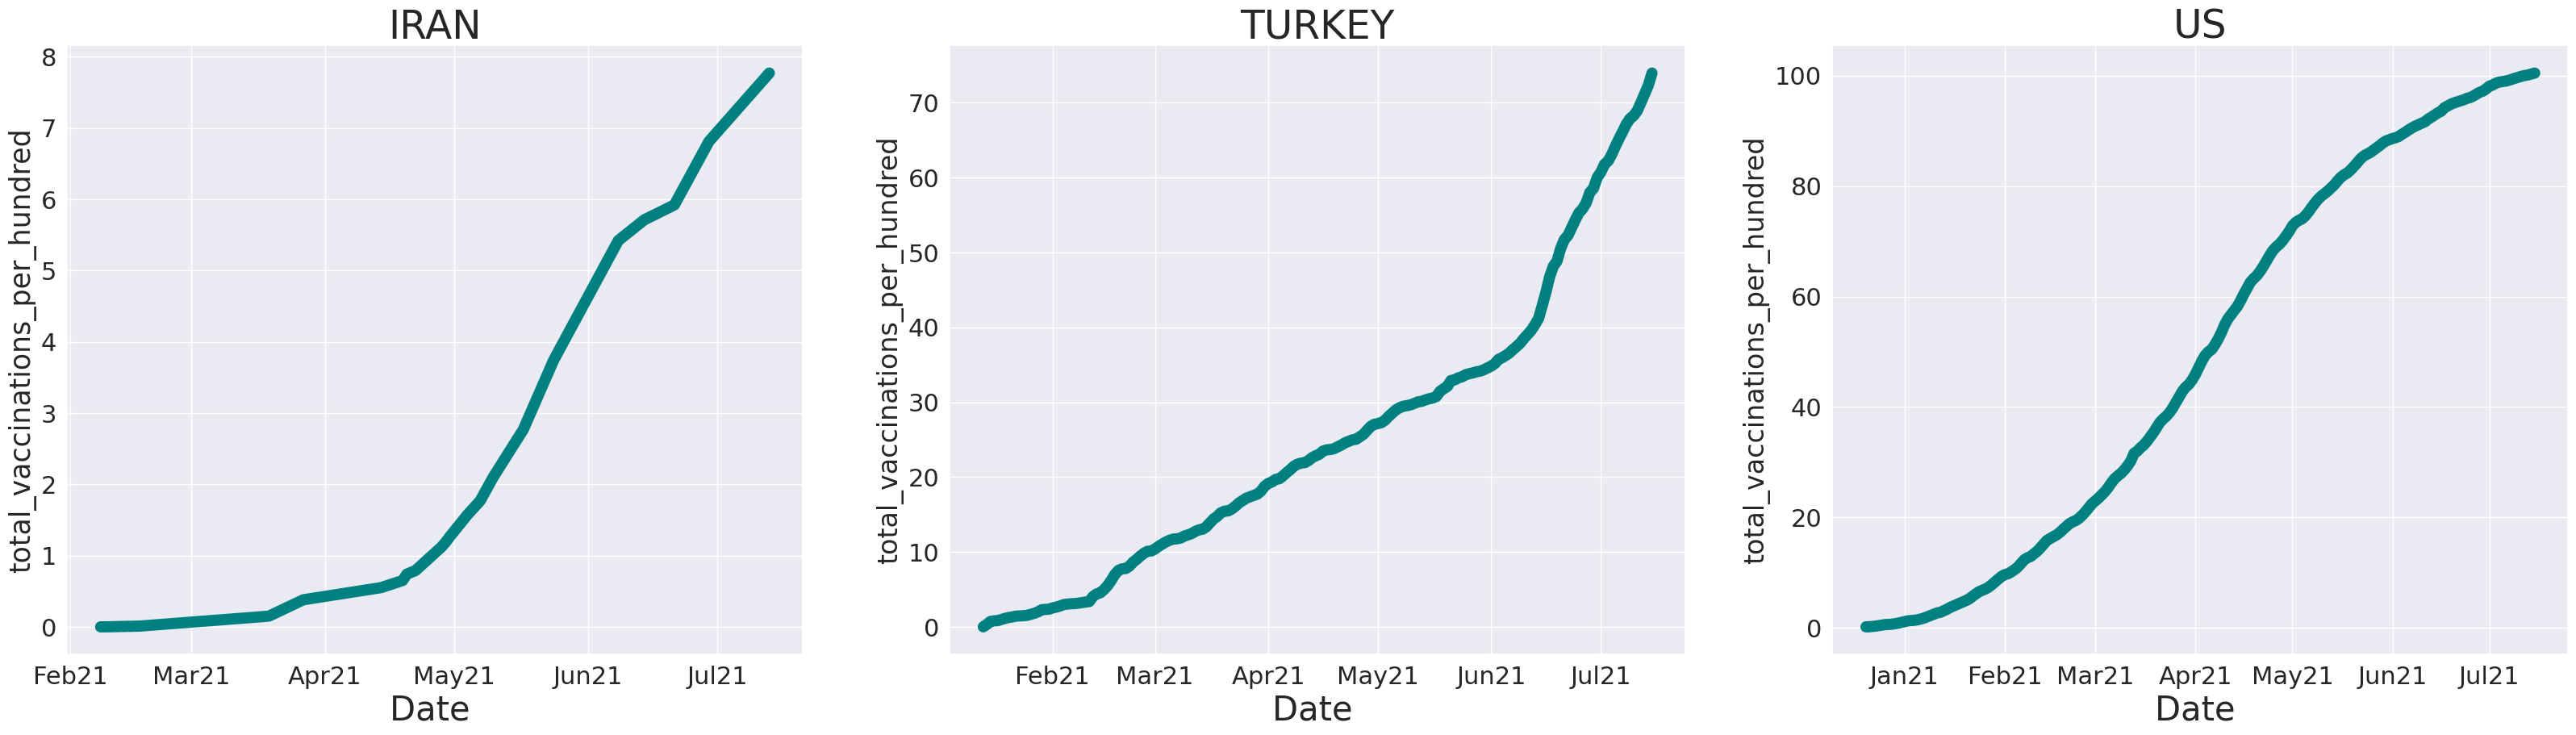

In [20]:
################### Studying Iran Vaccination against Turkey and US ###############
IranVacc = covidv[covidv['country'] == 'Iran']
TurkeyVacc =covidv[covidv['country'] == 'Turkey']
USVacc = covidv[covidv['country'] == 'United States']
fig, ax = plt.subplots(nrows=1, ncols=3, dpi=100, figsize=(40,10))

# total_vaccinations_per_hundred 

sns.lineplot(data =IranVacc, x='date', y='total_vaccinations_per_hundred', ax=ax[0], color = 'teal', linewidth=10)
sns.lineplot(data = TurkeyVacc, x='date', y='total_vaccinations_per_hundred',ax=ax[1], color = 'teal', linewidth=10)
sns.lineplot(data = USVacc, x='date', y='total_vaccinations_per_hundred',ax=ax[2], color = 'teal', linewidth=10)
ax[0].set_ylabel("total_vaccinations_per_hundred", fontsize = 25)
ax[0].set_xlabel("Date ",fontsize = 30)
ax[1].set_xlabel("Date ",fontsize = 30)
ax[2].set_xlabel("Date ",fontsize = 30)
ax[0].set_title("IRAN", fontsize=35)
ax[1].set_title("TURKEY", fontsize=35)
ax[2].set_title("US", fontsize=35)
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].xaxis.set_major_formatter(DateFormatter('%b%y'))


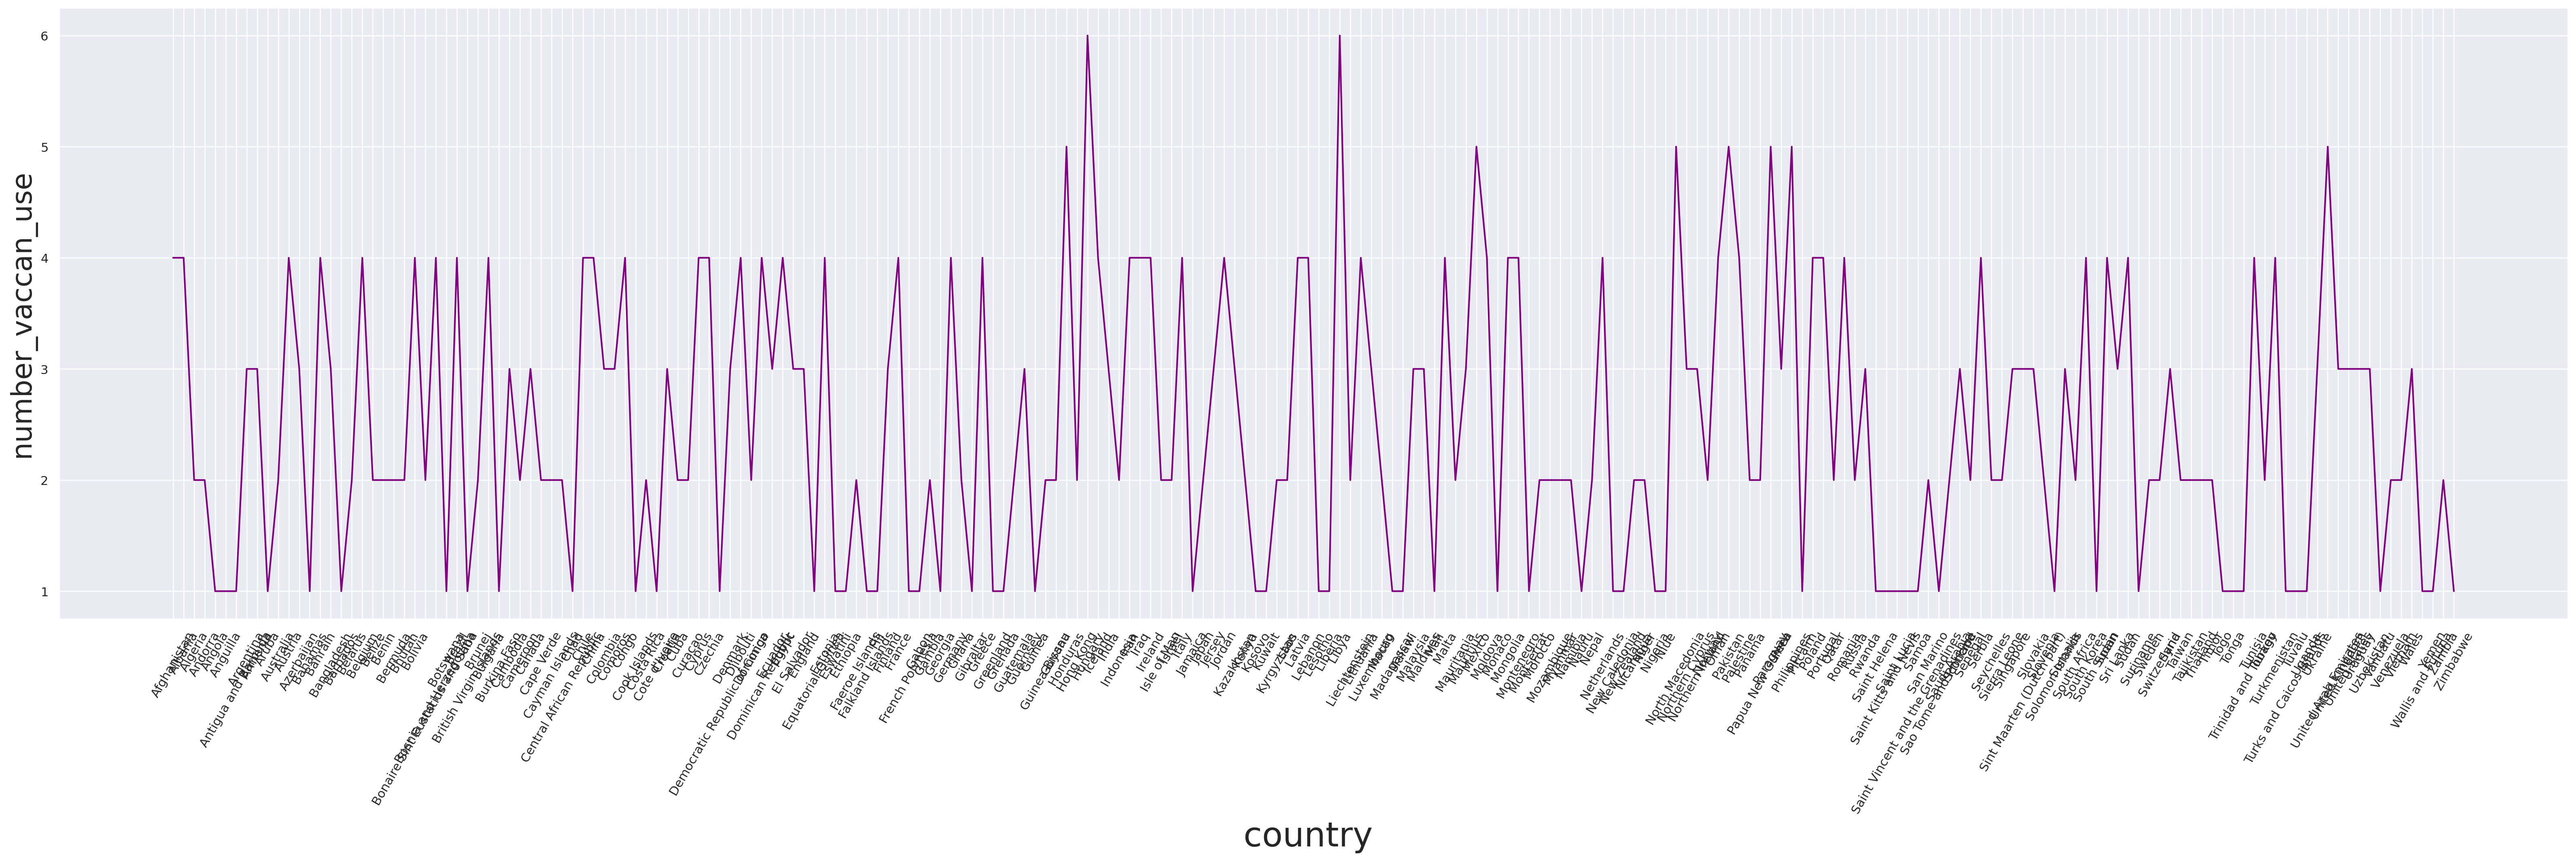

In [21]:
# We found that each country used several types of vaccines
def convert(k):
    count_vac_use = k
    lis= count_vac_use.tolist()
    i=0
    while i<len(lis):
        my_string = lis[0] 
        my_list = my_string.split(",")
        return len(my_list)
lst1=[]    
for i in range(len(covidv.country.unique().tolist())):
    m = covidv.country.unique().tolist()[i]
    n = covidv[covidv['country'] == str(m)]['vaccines'].unique()
    lst2 = [m,convert(n)]
    lst1.append(lst2)
type_count_vacc = pd.DataFrame(lst1,columns =['country','number_vaccan_use'])
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=200, figsize=(40,10))
    
sns.lineplot(data =type_count_vacc, x='country', y='number_vaccan_use',  color = 'purple',ax=ax)    
ax.set_ylabel("number_vaccan_use", fontsize = 25)
ax.set_xlabel("country ",fontsize = 30)
for label in ax.xaxis.get_ticklabels():
            label.set_rotation(60)


<AxesSubplot:xlabel='numberv_type_vacc', ylabel='number_country_use'>

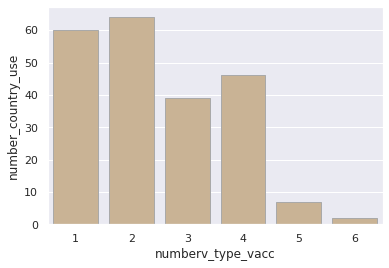

In [22]:
def Count_Type_Vac(t):
    lst_t =[]
    for j in range(len(lst1)):
        if lst1[j][1]== t:
            lst_x = lst1[j]
            lst_t.append(lst_x)
    return len(lst_t)
lis_Count_Type_Vac = []
for i in range(1,7):
    lis_Count_Type_Vac.append([i,Count_Type_Vac(i)])

count_Type = pd.DataFrame(lis_Count_Type_Vac,columns =['numberv_type_vacc','number_country_use'])
count_Type
sns.barplot(data = count_Type,x ='numberv_type_vacc' ,y = 'number_country_use', color='tan', edgecolor='darkgrey')

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> Train your Model </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

# Visualizing *regression* models

<AxesSubplot:xlabel='Day_num', ylabel='people_vaccinated_per_hundred'>

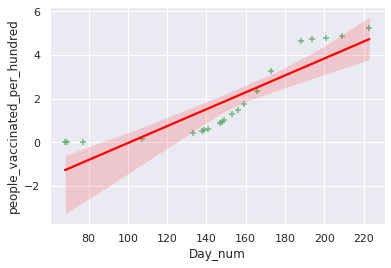

In [23]:
# Visualizing regression models in IRAN
IranVacc = covidv[covidv['country'] == 'Iran']
sns.regplot(x="Day_num", y="people_vaccinated_per_hundred", data=IranVacc,marker="+",scatter_kws={"color": "g"}, line_kws={"color": "red"})

## Train your model (Regression)

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> Regression </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

# Linear Regression

In [24]:
# Linear Regression between people_vaccination_per_hunder & Day_num
Iran_daynum_people=IranVacc[["Day_num", "people_vaccinated_per_hundred"]]
Iran_daynum_people.dropna(inplace = True)

In [25]:
## Simple Linear Regression (SLR) by registered (Strong relationship )
X = Iran_daynum_people[['Day_num']]
y =  Iran_daynum_people['people_vaccinated_per_hundred']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)

In [27]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
Simple_LR = LinearRegression()

# Train the model using the training sets 

Simple_LR.fit(X_train, y_train)

LinearRegression()

In [28]:
# y = ax+b this is          
Simple_LR.coef_ 

array([0.0361683])

In [29]:
Simple_LR.intercept_

-3.6856496759105672

In [30]:
y_pred=Simple_LR.predict(X_test)

In [31]:
X_test

,Day_num
13249,209
13241,201
13147,107
13108,68
13179,139
13263,223


<AxesSubplot:xlabel='people_vaccinated_per_hundred', ylabel='Count'>

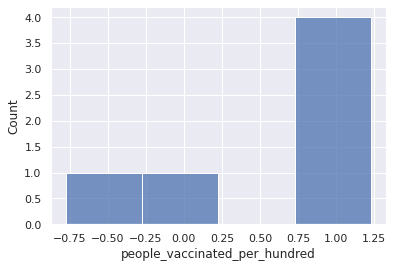

In [32]:
sns.histplot(y_test-y_pred)

In [33]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.8451131271382503
Mean Absolute Error: 0.8424538142210927
Mean Squared Error: 0.8677571471384612
Root Mean Squared Error: 0.9315348340982538


<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Polynomial regression  </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">    
</div>

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [35]:
X = Iran_daynum_people[['Day_num']]
y =  Iran_daynum_people['people_vaccinated_per_hundred']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 4)

In [37]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=4)
   
# transform the features to higher degree features.
X_train_biquadratic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
biquadratic = LinearRegression()

biquadratic.fit(X_train_biquadratic, y_train)
     
# predicting on training data-set
y_train_predicted = biquadratic.predict(X_train_biquadratic)
   
# predicting on test data-set
y_test_predicted = biquadratic.predict(poly_features.fit_transform(X_test))
print(y_test_predicted)

[ 5.58539605  5.33610027 -0.05369937 -0.12420985  0.49130632  5.13438265]


In [38]:
metrics.r2_score(y_train, y_train_predicted)

0.9939491811375767

In [39]:
metrics.r2_score(y_test, y_test_predicted)

0.9725626030647082

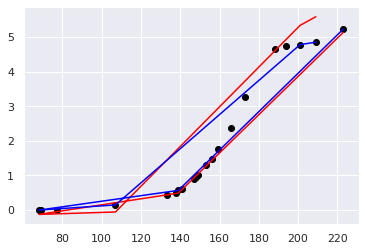

In [40]:
plt.scatter(X, y, color='black')
plt.plot(X_test, y_test_predicted, color='red')
plt.plot(X_test, y_test, color='blue')
plt.show()

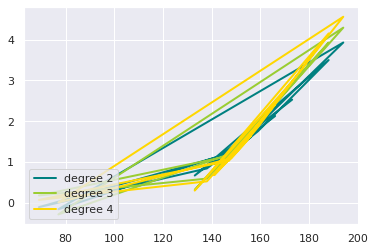

In [41]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
for count, degree in enumerate([2, 3, 4]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_train)
    plt.plot(X_train, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

# Visualizing *regression* models 

<AxesSubplot:xlabel='Day_num', ylabel='people_vaccinated_per_hundred'>

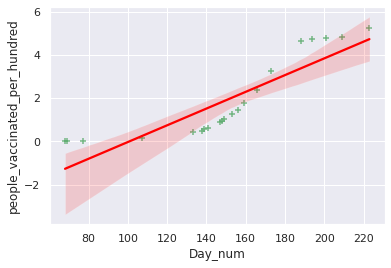

In [42]:
# Visualizing *regression* models
IndaiVacc = covidv[covidv['country'] == 'India']
sns.regplot(x="Day_num", y="people_vaccinated_per_hundred", data=IranVacc,marker="+",scatter_kws={"color": "g"}, line_kws={"color": "red"})

# Linear Regression in India

In [43]:
# Linear Regression between people_vaccination_per_hunder & Day_num
India_daynum_people=IndaiVacc[["Day_num", "people_vaccinated_per_hundred"]]
India_daynum_people.dropna(inplace = True)

In [44]:
## Simple Linear Regression (SLR) by registered (Strong relationship )
X = India_daynum_people[['Day_num']]
y =  India_daynum_people['people_vaccinated_per_hundred']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)

In [46]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
Simple_LR = LinearRegression()

# Train the model using the training sets 

Simple_LR.fit(X_train, y_train)

LinearRegression()

In [47]:
# y = ax+b this is          
Simple_LR.coef_ 

array([0.12520552])

In [48]:
Simple_LR.intercept_

-9.313419016493183

In [49]:
y_pred=Simple_LR.predict(X_test)

In [50]:
X_test.head(5)

,Day_num
12879,181
12912,214
12886,188
12832,134
12756,58


In [51]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9309932532113857
Mean Absolute Error: 1.6143895867122084
Mean Squared Error: 4.034167623194882
Root Mean Squared Error: 2.008523742253221


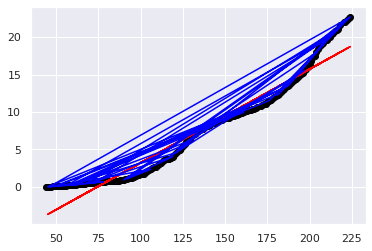

In [52]:
plt.scatter(X, y, color='black')
plt.plot(X_test, y_pred, color='red')
plt.plot(X_test, y_test, color='blue')
plt.show()

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 20pt;">Kmodes </span></strong>
<p style="text-align: center;"> country_vaccinations DATASET <strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

In [53]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [54]:
from kmodes.kmodes import KModes

In [55]:
from kmodes.kprototypes import KPrototypes

In [56]:
kP = KPrototypes(n_clusters=3, init='Huang', n_init=1, verbose=True)

In [57]:
country_peo_ful_vac_per_hund= covidv[["country","people_fully_vaccinated_per_hundred"]]
country_peo_ful_vac_per_hund.dropna(inplace = True)
type(country_peo_ful_vac_per_hund)
country_peo_ful_vac_per_hund_max = country_peo_ful_vac_per_hund.groupby(['country'])['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False)
type(country_peo_ful_vac_per_hund_max)
df = pd.DataFrame({'country':country_peo_ful_vac_per_hund_max.index, 'people_fully_vaccinated_per_hundred':country_peo_ful_vac_per_hund_max.values})
df

,country,people_fully_vaccinated_per_hundred
0,Gibraltar,115.69
1,Malta,80.40
2,Iceland,73.89
3,Cayman Islands,70.32
4,Seychelles,69.29
...,...,...
200,Yemen,0.03
201,Burkina Faso,0.02
202,Papua New Guinea,0.01
203,Democratic Republic of Congo,0.01


In [58]:
kP.fit_predict(df, categorical=[0])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 31, ncost: 18124.89991983903
Run: 1, iteration: 2/100, moves: 17, ncost: 16453.91046853717
Run: 1, iteration: 3/100, moves: 11, ncost: 15706.270516852672
Run: 1, iteration: 4/100, moves: 8, ncost: 15344.858410056448
Run: 1, iteration: 5/100, moves: 5, ncost: 15209.223821176467
Run: 1, iteration: 6/100, moves: 3, ncost: 15145.97990271736
Run: 1, iteration: 7/100, moves: 2, ncost: 15127.712634943642
Run: 1, iteration: 8/100, moves: 0, ncost: 15127.712634943642


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=uint16)

In [59]:
kP.cluster_centroids_

array([['53.4562962962963', 'Anguilla'],
       ['4.138679245283018', 'Afghanistan'],
       ['25.532666666666657', 'Albania']], dtype='<U32')

In [60]:
df["cluster_id"] = kP.labels_

In [61]:
df.head(40)

,country,people_fully_vaccinated_per_hundred,cluster_id
0,Gibraltar,115.69,0
1,Malta,80.40,0
2,Iceland,73.89,0
3,Cayman Islands,70.32,0
4,Seychelles,69.29,0
5,United Arab Emirates,67.80,0
6,San Marino,67.18,0
7,Bermuda,62.68,0
8,Isle of Man,62.66,0
9,Bahrain,60.41,0


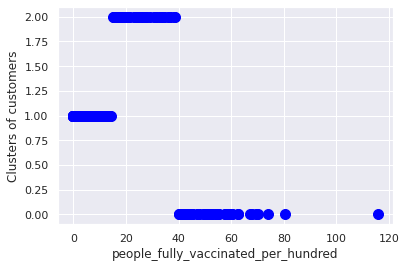

In [62]:

plt.scatter(df["people_fully_vaccinated_per_hundred"], df["cluster_id"],s = 100,c = 'blue', label = 'Cluster 1')
plt.xlabel('people_fully_vaccinated_per_hundred')
plt.ylabel('Clusters of customers')
plt.show()

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 20pt;">K-means </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

In [63]:
from sklearn.cluster import KMeans

In [64]:
covidv

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Day_num,Day,Month,Year
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,82,22,2,2021
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,83,23,2,2021
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,84,24,2,2021
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,85,25,2,2021
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,86,26,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,221,11,7,2021
31236,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,222,12,7,2021
31237,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,223,13,7,2021
31238,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,224,14,7,2021


In [65]:
# K-means for country and total caccination

country_totalvac = covidv.iloc[:, [0, 3]]
country_totalvac.dropna(inplace=True)
country_totalvac["total_vaccinations"] = country_totalvac["total_vaccinations"] .astype(int)
X = country_totalvac
X



,country,total_vaccinations
0,Afghanistan,0
6,Afghanistan,8200
22,Afghanistan,54000
44,Afghanistan,120000
59,Afghanistan,240000
...,...,...
31235,Zimbabwe,1491397
31236,Zimbabwe,1531868
31237,Zimbabwe,1575539
31238,Zimbabwe,1613640


In [66]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X['country'] = labelencoder.fit_transform(X['country'])
# Choise most total vaccination in country for clustering

appended_data = []
for i in range(len(X)):
    data = X.query('country=='+str(i)).nlargest(1, 'total_vaccinations')
    appended_data.append(data)     
appended_data = pd.concat(appended_data) 
X = appended_data


In [67]:
from sklearn.cluster import KMeans
X  = X.values

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

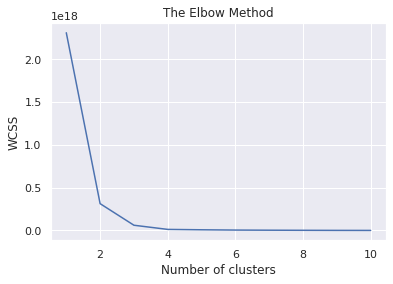

In [69]:
#  Find  Elbow Curve
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
# n_clusters = 2 --> Elbow Curve
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

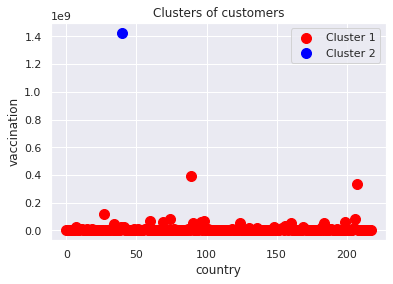

In [71]:
# two cluster exist between 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('country')
plt.ylabel('vaccination')
plt.legend()
plt.show()

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">country_vaccinations_by_manufacturer </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

In [72]:
vacmanu = pd.read_csv('../input/country-vaccinations-by-manufacturer/country_vaccinations_by_manufacturer.csv')

In [73]:
vacmanu.shape

(9157, 4)

In [74]:
vacmanu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            9157 non-null   object
 1   date                9157 non-null   object
 2   vaccine             9157 non-null   object
 3   total_vaccinations  9157 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 286.3+ KB


In [75]:
# check miss value
vacmanu.isnull().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

In [76]:
vacmanu.head(5)

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0


In [77]:
vacmanu['date'] = pd.to_datetime(vacmanu['date'], format = '%Y-%m-%d')
vacmanu

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
9152,Uruguay,2021-07-14,Pfizer/BioNTech,1229299
9153,Uruguay,2021-07-14,Sinovac,3140277
9154,Uruguay,2021-07-15,Oxford/AstraZeneca,61907
9155,Uruguay,2021-07-15,Pfizer/BioNTech,1255929


In [78]:
vacmanu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            9157 non-null   object        
 1   date                9157 non-null   datetime64[ns]
 2   vaccine             9157 non-null   object        
 3   total_vaccinations  9157 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 286.3+ KB


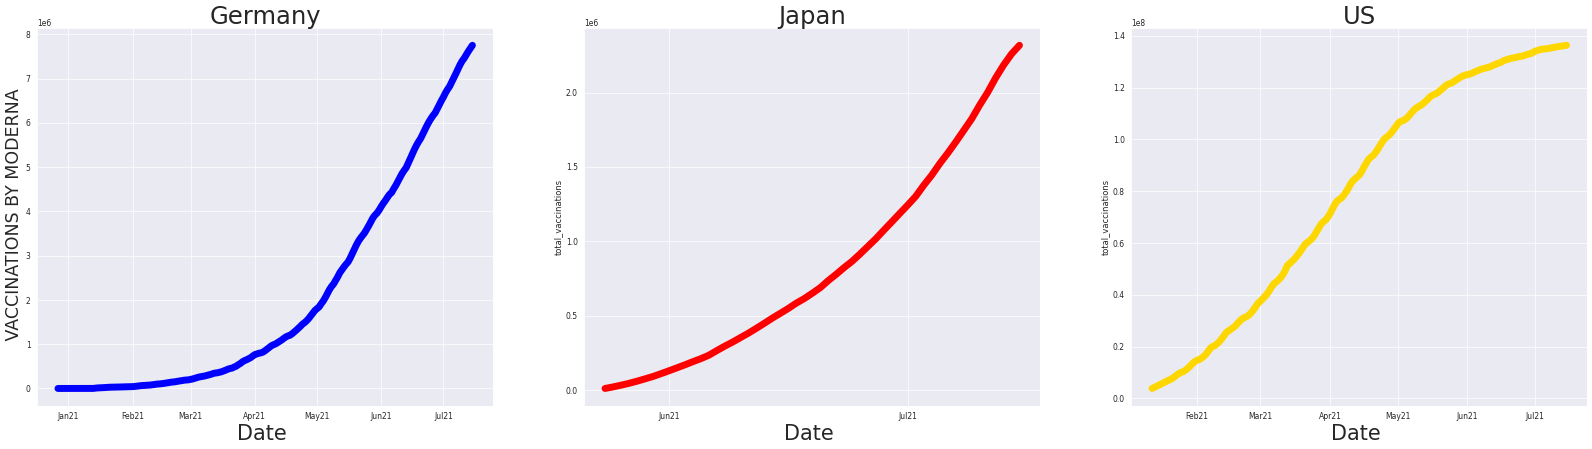

In [79]:
GermVacc = vacmanu[vacmanu['location'] == 'Germany']
GermVacc.query(' vaccine == "Moderna" ', inplace= True)
JapanVacc =vacmanu[vacmanu['location'] == 'Japan']
JapanVacc.query(' vaccine == "Moderna" ', inplace= True)
USVacc = vacmanu[vacmanu['location'] == 'United States']
USVacc.query(' vaccine == "Moderna" ', inplace= True)

fig, ax = plt.subplots(nrows=1, ncols=3, dpi=50, figsize=(40,10))
sns.set(font_scale=2)
sns.lineplot(data =GermVacc, x='date', y='total_vaccinations',
             ax=ax[0], color = 'blue', linewidth=10)
sns.lineplot(data = JapanVacc, x='date', y='total_vaccinations',
             ax=ax[1], color = 'red', linewidth=10)
sns.lineplot(data = USVacc, x='date', y='total_vaccinations',
             ax=ax[2], color = 'gold', linewidth=10)
ax[0].set_ylabel(" VACCINATIONS BY MODERNA", fontsize = 25)
ax[0].set_xlabel("Date ",fontsize = 30)
ax[1].set_xlabel("Date ",fontsize = 30)
ax[2].set_xlabel("Date ",fontsize = 30)
ax[0].set_title("Germany", fontsize=35)
ax[1].set_title("Japan", fontsize=35)
ax[2].set_title("US", fontsize=35)
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].xaxis.set_major_formatter(DateFormatter('%b%y'))



In [80]:
Vacc = vacmanu.groupby('vaccine').sum().sort_values(by=['total_vaccinations'], ascending=False)
Vacc

,total_vaccinations
vaccine,
Pfizer/BioNTech,33043499443
Moderna,16100615737
Oxford/AstraZeneca,2735776039
Sinovac,1942688928
Johnson&Johnson,1282709647
Sinopharm/Beijing,28325183
Sputnik V,24103447
CanSino,12000606


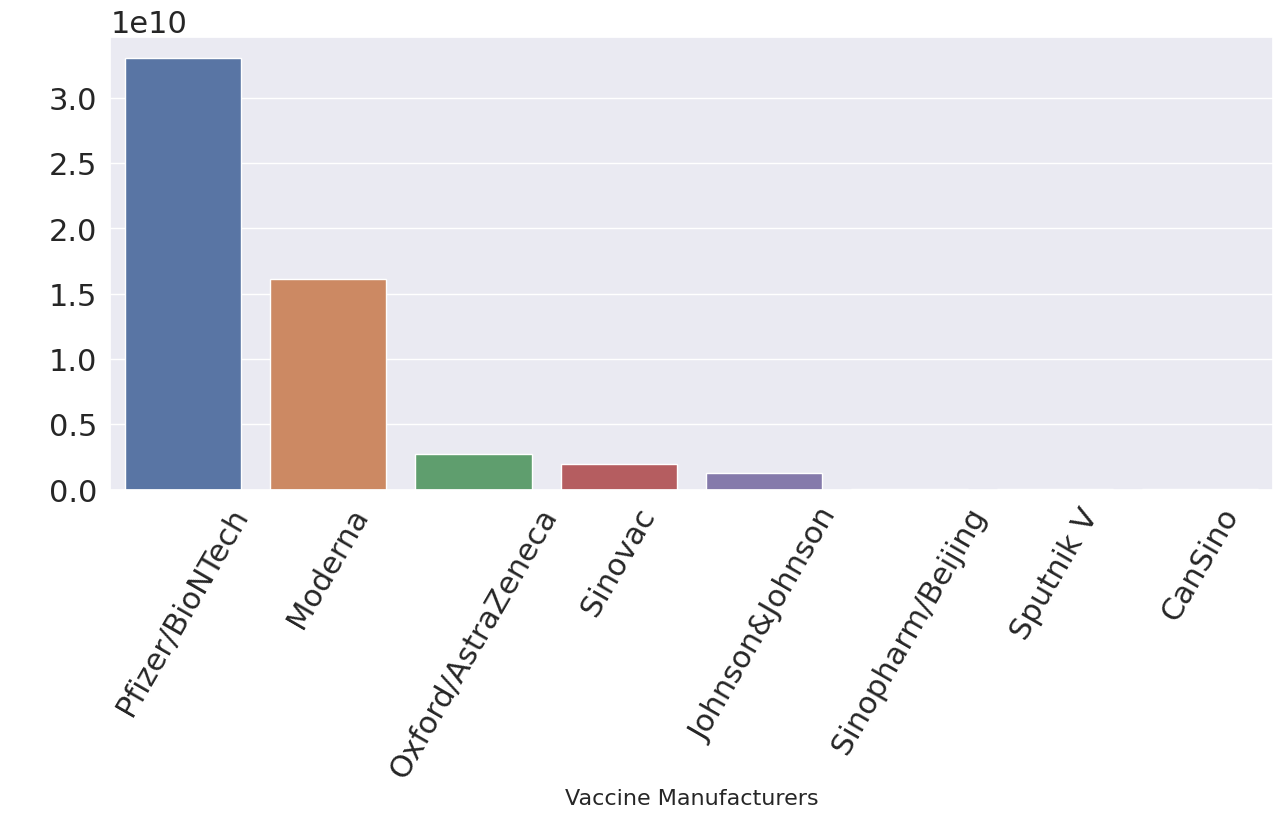

In [81]:
Vacc = vacmanu.groupby('vaccine').sum().sort_values(by=['total_vaccinations'], ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (15,6))
sns.set()
sns.barplot(x=Vacc.index, y=Vacc['total_vaccinations'], ax=ax)
ax.set_xlabel("Vaccine Manufacturers", fontsize = 16)
ax.set_ylabel(" ")
for label in ax.xaxis.get_ticklabels():
            label.set_rotation(60)

plt.show()

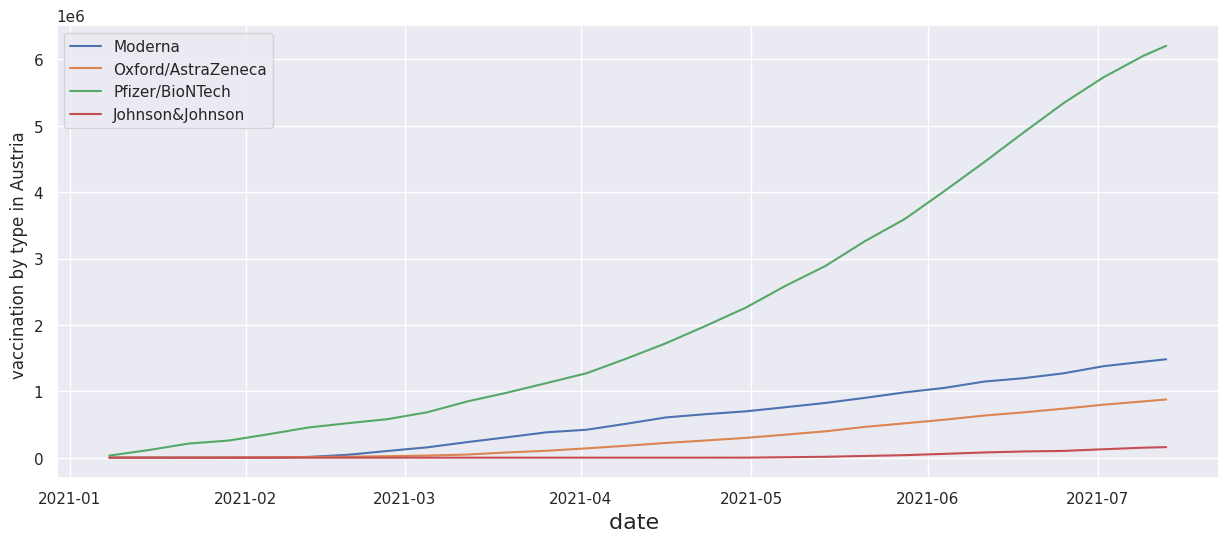

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (15,6))
vac_type_locAus_Moderna= vacmanu.query( 'vaccine == "Moderna"   and location =="Austria" ')
vac_type_locAus_Oxf= vacmanu.query( 'vaccine == "Oxford/AstraZeneca"   and location =="Austria" ')
vac_type_locAus_Pfizer= vacmanu.query( 'vaccine == "Pfizer/BioNTech"   and location =="Austria" ')
vac_type_locAus_johnson= vacmanu.query( 'vaccine == "Johnson&Johnson"   and location =="Austria" ')
label =  ["Moderna","Oxford/AstraZeneca","Pfizer/BioNTech","Johnson&Johnson"]
j = 0
sns.set()
for i in [vac_type_locAus_Oxf,vac_type_locAus_Moderna,vac_type_locAus_Pfizer,vac_type_locAus_johnson]:
    sns.lineplot(data =i, x='date', y=i['total_vaccinations'],ax = ax,label = label[j])
    ax.set_xlabel("date ", fontsize = 16)
    ax.set_ylabel("vaccination by type in Austria ")
    j +=1
plt.show()

# GOOD  LUCK!